In [1]:
#iporting the libraries
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

In [2]:
##reading the raw data an storing in df variable
df = pd.read_csv("/content/drive/MyDrive/Youtube Data Analysis/US_youtube_trending_data.csv")

In [3]:
##reading the raw data an storing in df variable
df2 = pd.read_json("/content/drive/MyDrive/Youtube Data Analysis/US_category_id.json")

In [8]:
df.drop(['tags','thumbnail_link','description'],axis=1,inplace=True)

In [ ]:
##finding the number of null values in the dataset
df.isnull().sum()

In [ ]:
##Checkig the datatype of the column
df.info()

In [9]:
##convert one data type to another
df['trending_date']=pd.to_datetime(df['trending_date'])

In [10]:
##convert one data type to another
df['publishedAt']=pd.to_datetime(df['publishedAt'])

In [11]:
## extract year from the date
df['publish_year']=df['publishedAt'].dt.year

In [12]:
## extract month from the date
df['publish_month']=df['publishedAt'].dt.month_name()


In [13]:
##trending_date      extract year from date
df['Trending_year']=df['trending_date'].dt.year

In [14]:
##trending_date      extract month from date
df['Trending_month']=df['trending_date'].dt.month_name()

In [ ]:
df2['items'][0]

In [ ]:
df['categoryId'].unique()

In [20]:
##to find all the ids in the list
id=[]
for i in range  (0,32):
    id.append(df2['items'][i]['id'])
print(id)
##second method
##id=[ df2['items'][i]['id'] for i in range  (32)])

['1', '2', '10', '15', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44']


In [21]:
##To get the all the titles from the jason file
##method 1
titles=[]
for i in range(0,32):
  titles.append(df2['items'][i]['snippet']['title'])
print(titles)

##Method 2(list comprihension)
titles=[df2['items'][i]['snippet']['title'] for i in range(32)]


['Film & Animation', 'Autos & Vehicles', 'Music', 'Pets & Animals', 'Sports', 'Short Movies', 'Travel & Events', 'Gaming', 'Videoblogging', 'People & Blogs', 'Comedy', 'Entertainment', 'News & Politics', 'Howto & Style', 'Education', 'Science & Technology', 'Nonprofits & Activism', 'Movies', 'Anime/Animation', 'Action/Adventure', 'Classics', 'Comedy', 'Documentary', 'Drama', 'Family', 'Foreign', 'Horror', 'Sci-Fi/Fantasy', 'Thriller', 'Shorts', 'Shows', 'Trailers']


In [22]:
## To convert to data frame we use pd.dataframe
sid=['ST1','ST2','ST3','ST4']
sname=['XYZ','PQR','RST','KMN']

In [23]:
gt=pd.DataFrame({"student id":sid,"Student name":sname,"Address":['hyd','ben','del','gur']})

In [ ]:
gt

In [25]:
new= pd.DataFrame({'CategoryID':id,'title':titles})

In [ ]:
new

In [ ]:
new.info()

In [28]:
new['CategoryID']=pd.to_numeric(new['CategoryID'])

In [29]:
from sqlalchemy import column
## To rename the column
new.rename(columns={'CategoryID':'categoryId'},inplace=True)

In [ ]:
new

In [ ]:
df.info()

In [ ]:
new


In [33]:
## To merge colums or to join columns from 2 files or 2 tables use the below function or type
data=pd.merge(df,new,how='inner',on='categoryId')

In [ ]:
data[data['video_id']=='3C66w5Z0ixs']

In [ ]:
df.info()

In [36]:
## Grouping the data
Gt=data.groupby('video_id')

In [37]:
video=Gt.max()

In [38]:
## resetting the index
video=video.reset_index()

In [ ]:
video

In [40]:
##grouping the publish_year
pyear=video.groupby('publish_year')

In [ ]:
pyear.count()

In [ ]:
df.info()

In [ ]:
video.info()

In [44]:
vtitle=video.groupby('title_y')

In [ ]:
vtitle.head(2)

In [46]:
ts=video[video['title_y']=='Sports']

In [47]:
gs=ts.groupby('channelTitle')

In [ ]:
##sorting the data by top channel desending order
gs.sum().sort_values(by='view_count',ascending=False)

In [ ]:
gs.max('view_count')


In [50]:
##which genre is best based on views
##what are the top video of each channel in sport category
## what are the most dislike channel in the sport category
##most liked channel in sport category

In [ ]:
video

In [52]:
grouptr = video.groupby(['title_y','channelTitle'])

In [ ]:
video['title_y']

In [55]:
if 'title_y' =='Sports':
  video.agg({'channelTitle':min,'view_count':max})


In [ ]:
video

In [57]:
ab=lambda a:a**3

In [ ]:
ab(7)

In [59]:
lrt=lambda y1,y2:[i for i in range(y1,y2)]

In [ ]:
lrt(1,11)

In [61]:
from numpy import mean
lrt=lambda x1,x2:mean([i for i in range(x1,x2+1) if i%2==0])

In [ ]:
lrt(1,5)

In [63]:
lrt2=lambda x1,x2:sum([i for i in range(x1,x2+1)])/len([i for i in range(x1,x2+1)])

In [ ]:
lrt2(1,10)

In [ ]:
grouptr.agg({'view_count':['min','max','mean'],'likes':lambda g:sum([i/100 for i in g ])/len([i for i in g ])})

In [ ]:
video.iloc[2:11,1:3]

In [ ]:
##to get some range of data we use .iloc functin
video.iloc[1:16:2,0:5:2]

In [ ]:
##Toget some custome rows we use .loc function
video.loc[2:100:1900],['view_count','likes']

In [69]:
color=['red','blue','green']
quant=[10,5,20]

<BarContainer object of 3 artists>

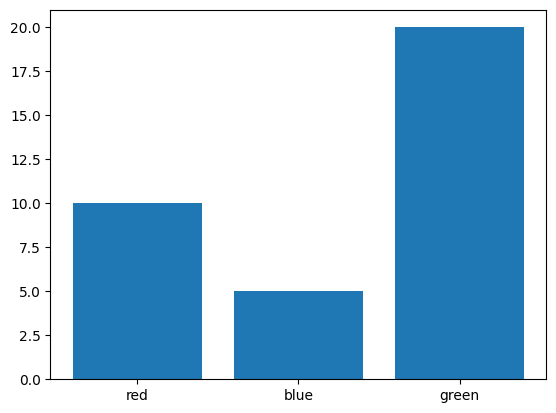

In [70]:
plt.bar(x=color,height=quant)

<Axes: xlabel='view_count', ylabel='title_y'>

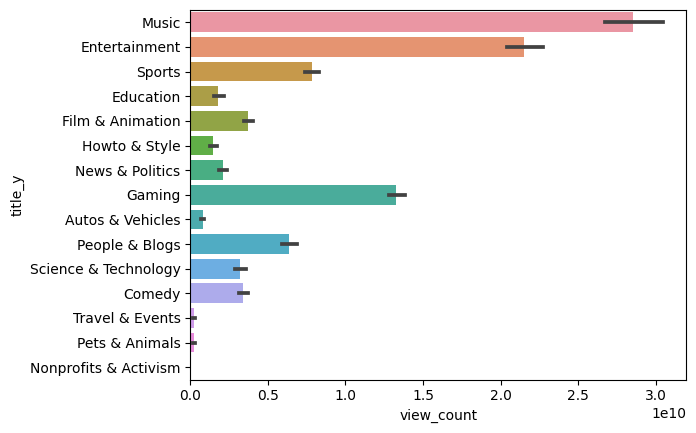

In [71]:
sns.barplot(y='title_y',x='view_count',data=video,estimator='sum')

In [72]:
m=video[video['title_y']=='Music']

In [73]:
gv=m.groupby(by='channelTitle')

In [74]:
ms=gv.sum().sort_values(by='view_count',ascending=False).head()

<ipython-input-74-2f4e8e182680>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ms=gv.sum().sort_values(by='view_count',ascending=False).head()


In [ ]:
ms


<Axes: xlabel='view_count', ylabel='channelTitle'>

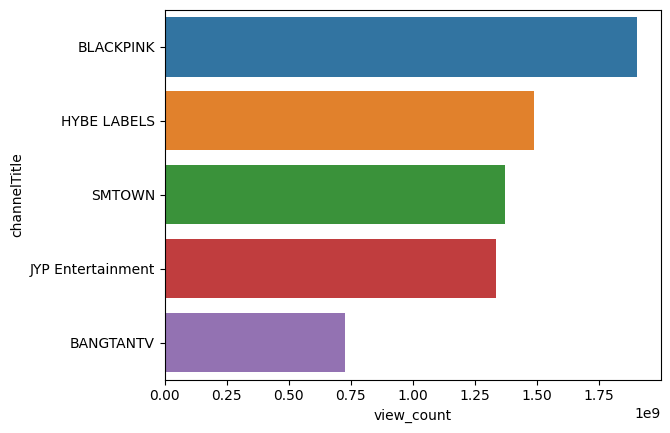

In [76]:
sns.barplot(y=ms.index,x=ms['view_count'])

In [77]:
gaming=video[video['title_y']=='Gaming']

In [78]:
ga=gaming.groupby(by='channelTitle')

In [79]:
g2=ga.max().sort_values(by='view_count',ascending=False).head()

In [ ]:
g2

<Axes: xlabel='view_count', ylabel='channelTitle'>

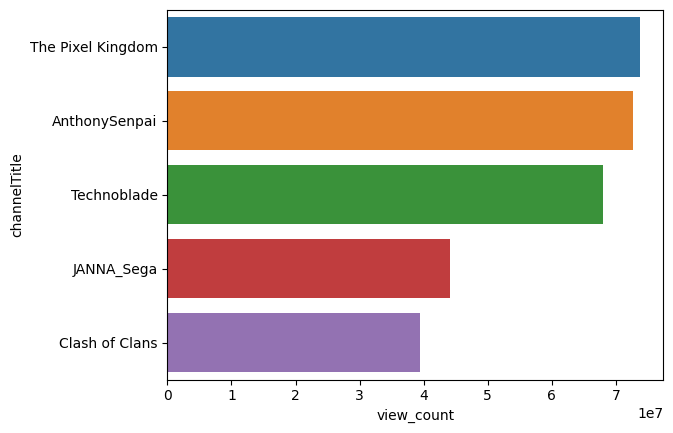

In [81]:
sns.barplot(y=g2.index,x=g2['view_count'])


In [82]:
gaming=video[video['title_y']=='Gaming']

In [83]:
ga=gaming.groupby(by='channelTitle')

In [84]:
g2=ga.max().sort_values(by='view_count',ascending=False).head()

In [85]:
def mytop(title):
  gaming=video[video['title_y']==title]
  ga=gaming.groupby(by='channelTitle')
  g2=ga.max().sort_values(by='view_count',ascending=False).head()
  sns.barplot(y = g2.index,x = g2['view_count'])


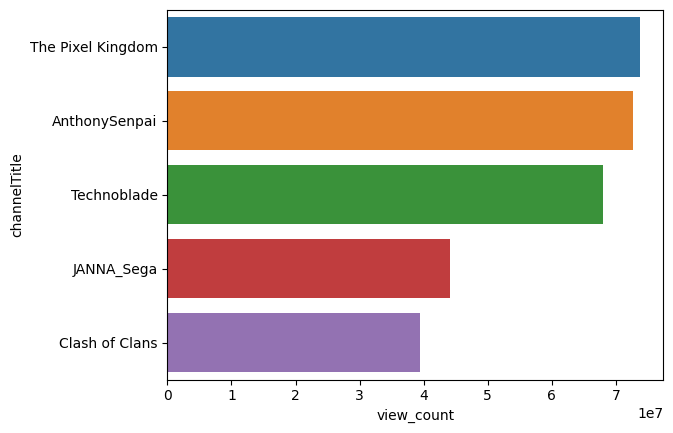

In [86]:
mytop('Gaming')

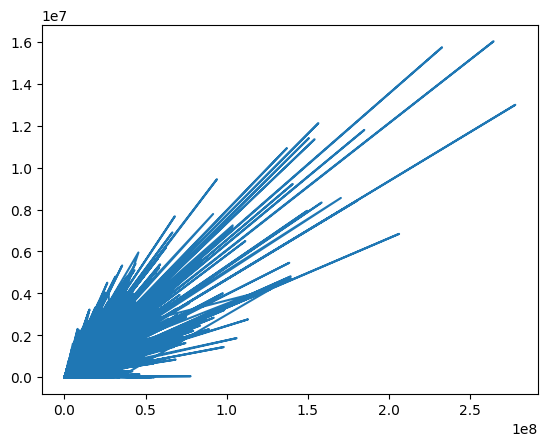

In [87]:
x=[3,6,4,8,5]
y=[2,4,6,8,10]
plt.plot(video['view_count'],video['likes'])

<Axes: xlabel='view_count', ylabel='likes'>

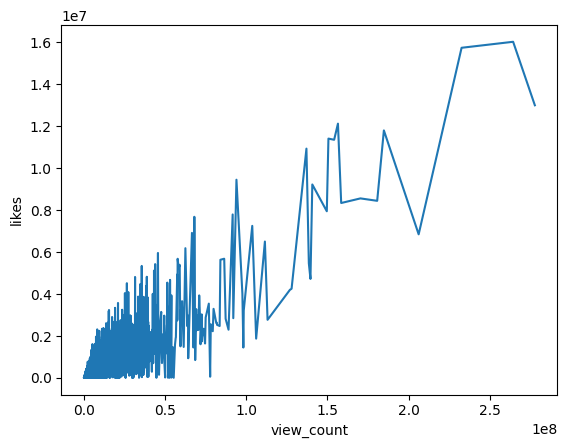

In [88]:
sns.lineplot(x=video['view_count'],y=video['likes'])

In [89]:
wid=widgets.Dropdown(
    options=video['title_y'].unique(),
    value='Music',
    description='Genre:',
    disabled=False,
)
def graph(a):
  dr=video[video['title_y']==a]
  gt=dr.groupby('channelTitle')
  gt=gt.sum().sort_values(by='view_count',ascending=False).head()
  sns.barplot(y=gt.index,x=gt['view_count'])
  plt.title(a)
  plt.xlabel('Views')
  plt.ylabel('Channel_Name')
  plt.show()


In [90]:
widgets.interact(graph,a=wid)

interactive(children=(Dropdown(description='Genre:', options=('Music', 'Entertainment', 'Sports', 'Education',…

<function __main__.graph(a)>

In [91]:
wid2=widgets.Dropdown(
    options=video['channelTitle'].unique(),
    value='NFL',
    description='Channel:',
    disabled=False,
)
def graph2(a1):
  dr=video[video['channelTitle']==a1]
  gt=dr.groupby('title_x')
  gt=gt.sum().sort_values(by='view_count',ascending=False).head()
  sns.barplot(y=gt.index,x=gt['view_count'])
  plt.title(a1)
  plt.xlabel('Views')
  plt.ylabel('Videos')
  plt.show()


In [92]:
widgets.interact(graph2,a1=wid2)

interactive(children=(Dropdown(description='Channel:', index=3, options=('MigosVEVO', 'jf.okay', 'Television A…

<function __main__.graph2(a1)>

In [ ]:
video

<Axes: >

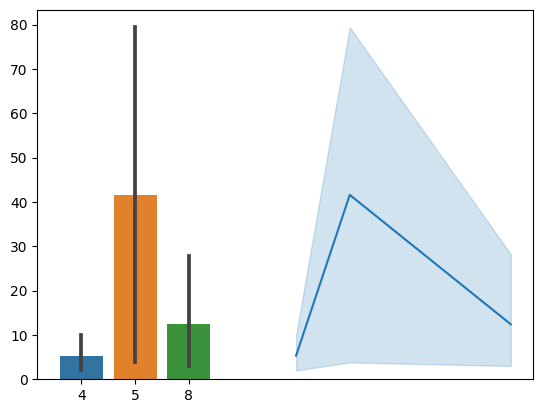

In [94]:
x1=[4,4,4,5,5,5,5,5,8,8,8,8,8]
y1=[10,4,2,5,2,98,98,5,6,43,1,3,9]
sns.barplot(x=x1,y=y1)
sns.lineplot(x=x1,y=y1)

In [95]:
a=widgets.Dropdown(
  options=['Bar','Line'],
  value='Bar',
  description='CHart Type:',
  disabled=False,
)
def new(b):
  if b=='Bar':
    sns.barplot(x=x1,y=y1)
    plt.show()
  if b=='Line':
    sns.lineplot(x=x1,y=y1)
    plt.show()


In [96]:
widgets.interact(new,b=a)

interactive(children=(Dropdown(description='CHart Type:', options=('Bar', 'Line'), value='Bar'), Output()), _d…

<function __main__.new(b)>

In [97]:
k1=widgets.Dropdown(
    options=video['title_y'].unique(),
    value='Music',
    description='Genre:',
    disabled=False,
    )
def genre(m):
      gen=video[video['title_y']==m]
      k2=widgets.Dropdown (
      options=gen['channelTitle'].unique(),
      value=gen['channelTitle'].unique()[0],
      description='Channel',
      disabled=False,
    )
      def channel(d):
          gt=gen.sort_values(by='view_count',ascending=False).head()
          sns.barplot(y=gt['title_x'],x=gt['view_count'])
          plt.title(d)
          plt.xlabel('Views')
          plt.ylabel('Videos')
          plt.show()

      widgets.interact(channel,d=k2)


In [98]:
widgets.interact(genre,m=k1)

interactive(children=(Dropdown(description='Genre:', options=('Music', 'Entertainment', 'Sports', 'Education',…

<function __main__.genre(m)>

In [99]:
data[data['video_id']=='3C66w5Z0ixs']

,video_id,title_x,publishedAt,channelId,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,publish_year,publish_month,Trending_year,Trending_month,title_y
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,1514614,156908,5855,35313,False,False,2020,August,2020,August,People & Blogs
22,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-13 00:00:00+00:00,3017834,183592,9506,41374,False,False,2020,August,2020,August,People & Blogs
46,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-14 00:00:00+00:00,3721729,195344,10648,44555,False,False,2020,August,2020,August,People & Blogs
69,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-15 00:00:00+00:00,3853404,200215,10904,45461,False,False,2020,August,2020,August,People & Blogs
95,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-16 00:00:00+00:00,3898795,201808,10975,45574,False,False,2020,August,2020,August,People & Blogs
122,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-17 00:00:00+00:00,3929527,203054,11026,45488,False,False,2020,August,2020,August,People & Blogs
145,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-18 00:00:00+00:00,3958226,204260,11070,45134,False,False,2020,August,2020,August,People & Blogs


In [100]:
p1=widgets.Dropdown(
    options=data['channelTitle'].unique(),
    value='Brawadis',
    description='Channel:',
    disabled=False,
    )
def channel(m):
      gen=data[data['channelTitle']==m]
      p2=widgets.Dropdown (
      options=gen['title_x'].unique(),
      value=gen['title_x'].unique()[0],
      description='Video',
      disabled=False,
    )
      def video(d):
          gt=gen[gen['title_x']==d]
          sns.lineplot(y=gt['trending_date'],x=gt['view_count'])
          plt.title(d)
          plt.xlabel('Views')
          plt.ylabel('Date')
          plt.show()

      widgets.interact(video,d=p2)


In [101]:
widgets.interact(channel,m=p1)

interactive(children=(Dropdown(description='Channel:', options=('Brawadis', 'CaseyNeistat', 'Smosh Pit', 'Tyle…

<function __main__.channel(m)>

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

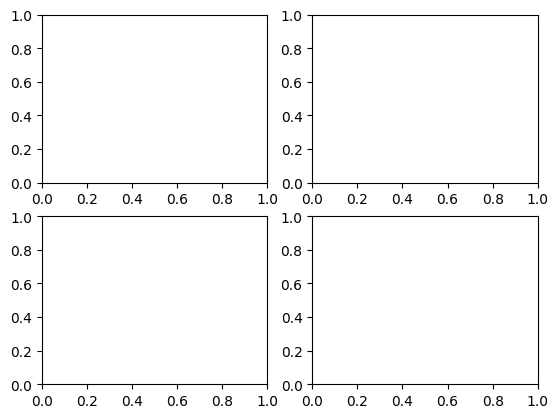

In [102]:
plt.subplots(2,2)

In [103]:
gt=video.sample(n=500)

In [104]:
plt.subplots(gt['likes'] and gt.axis(0,1))

ValueError: ignored

In [105]:
x='length of the longest word  of the string'
x1=x.split()
x1
k=[ len(i) for i in x1]
k
t1=max(k)
t1
inn =k.index(t1)
x1[inn]

'longest'

In [106]:
x1

['length', 'of', 'the', 'longest', 'word', 'of', 'the', 'string']

In [ ]:
fig,axes=plt.subplots(2,2)
sns.lineplot(x='view_count',y='likes',data=video,ax=axes[0,1])

In [ ]:
sns.lineplot(x='view_count',y='likes',data=video,ax=axes[0,1])
sns.barplot(x='view_count',y='likes',data=video,ax=axes[0,0])


In [107]:
video

,video_id,title_x,publishedAt,channelId,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,publish_year,publish_month,Trending_year,Trending_month,title_y
0,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,2021-06-15 00:00:00+00:00,6823249,262692,4107,16445,False,False,2021,June,2021,June,Music
1,--2O86Z0hsM,MY TESLA PAYS FOR ITSELF,2022-03-09 23:19:08+00:00,UCXJEvxZSozjAAqhbMfhIArA,jf.okay,24,2022-03-15 00:00:00+00:00,538485,17290,0,1439,False,False,2022,March,2022,March,Entertainment
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,2021-09-20 01:03:32+00:00,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,24,2021-09-25 00:00:00+00:00,682609,8029,369,723,False,False,2021,September,2021,September,Entertainment
3,--5-brQiQFg,Washington Commanders vs. San Francisco 49ers ...,2022-12-25 00:30:17+00:00,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,17,2022-12-26 00:00:00+00:00,1280997,14603,0,2078,False,False,2022,December,2022,December,Sports
4,--DKkzWVh-E,Why Retaining Walls Collapse,2021-12-07 13:00:00+00:00,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,27,2021-12-11 00:00:00+00:00,623949,29991,320,998,False,False,2021,December,2021,December,Education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36274,zzCrFWjKPy8,Season 1 Episode 3 Preview | House of the Drag...,2022-08-29 02:00:10+00:00,UCQzdMyuz0Lf4zo4uGcEujFw,GameofThrones,22,2022-09-03 00:00:00+00:00,2603821,47431,0,3586,False,False,2022,August,2022,September,People & Blogs
36275,zzd4ydafGR0,Lil Tjay - Calling My Phone (feat. 6LACK) [Off...,2021-02-12 05:03:49+00:00,UCEB4a5o_6KfjxHwNMnmj54Q,Lil Tjay,10,2021-02-21 00:00:00+00:00,13974461,728439,7579,57012,False,False,2021,February,2021,February,Music
36276,zziBybeSAtw,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,2021-01-16 05:39:05+00:00,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,17,2021-01-18 00:00:00+00:00,2598512,20024,989,2872,False,False,2021,January,2021,January,Sports
36277,zzk09ESX7e0,[MV] 마마무 (MAMAMOO) - Where Are We Now,2021-06-02 09:00:10+00:00,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,10,2021-06-09 00:00:00+00:00,9389223,584431,3403,77267,False,False,2021,June,2021,June,Music


In [108]:
y=video['likes']

In [109]:
x=video[['categoryId','view_count','dislikes','comment_count']]

In [110]:
x

,categoryId,view_count,dislikes,comment_count
0,10,6823249,4107,16445
1,24,538485,0,1439
2,24,682609,369,723
3,17,1280997,0,2078
4,27,623949,320,998
...,...,...,...,...
36274,22,2603821,0,3586
36275,10,13974461,7579,57012
36276,17,2598512,989,2872
36277,10,9389223,3403,77267


In [111]:
from sklearn.model_selection import train_test_split

In [132]:
from IPython.testing import test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2549)

In [133]:
x_train

,categoryId,view_count,dislikes,comment_count
31571,17,195173,0,372
34649,19,1776871,0,2977
2038,10,2799986,0,2089
7594,24,1614487,0,1360
31156,24,711428,374,4530
...,...,...,...,...
1666,24,7227023,0,9596
13705,2,588592,0,3659
12708,20,2570327,0,8082
12665,10,3893816,3335,31926


In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
lr=LinearRegression()

In [136]:
lr.fit(x_train,y_train)

LinearRegression()

In [137]:
lr.score(x_test,y_test)

0.7937495867757681

In [138]:
lr.score(x_train,y_train)

0.7880239018533108

In [139]:
from sklearn.neighbors import KNeighborsRegressor

In [143]:
for i in range(1,80):
   kn=KNeighborsRegressor(n_neighbors=i)
   kn.fit(x_train,y_train)
   print(i,kn.score(x_test,y_test))

1 0.4851977609952415
2 0.6450116917988091
3 0.6920729478789268
4 0.69433781031444
5 0.6983032122241022
6 0.7032275494698421
7 0.7147344524730417
8 0.7233752519097999
9 0.7212775511039491
10 0.7181152898222753
11 0.7161013042686051
12 0.7108805960352147
13 0.7085200417399315
14 0.7139238417017881
15 0.7090729573829258
16 0.7063661991445338
17 0.7004279674825238
18 0.6981981856391056
19 0.6980735705434081
20 0.6957882002391254
21 0.6954589343597168
22 0.6965936773048514
23 0.7002045442515705
24 0.6982294000961158
25 0.6957082722748996
26 0.692174563046455
27 0.6880750234330658
28 0.684310076333656
29 0.6776729582652272
30 0.6749763168644074
31 0.6721329298670652
32 0.6707185577499601
33 0.6671239232096086
34 0.6629299827677556
35 0.659513928502488
36 0.6563213743302165
37 0.652293110817221
38 0.6494135521086521
39 0.6474762545182144
40 0.6448113469500996
41 0.6433163032450688
42 0.6398964669645129
43 0.6387745558870179
44 0.635689548028056
45 0.6350394180697747
46 0.6332657312073415
47 0

In [141]:
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [142]:
kn.score(x_test,y_test)

0.6983032122241022

In [147]:
from sklearn.tree import DecisionTreeRegressor

In [148]:
dt=DecisionTreeRegressor()

In [149]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [150]:
dt.score(x_test,y_test)

0.7256268731963234

In [151]:
from sklearn.ensemble import RandomForestRegressor

In [162]:
for i in range(100,1000,30):
  rf=RandomForestRegressor(n_jobs=i)
  rf.fit(x_train,y_train)
  print(i,"training_results",rf.score(x_test,y_test),"Testing_results",rf.score(x_train,y_train))

100 training_results 0.8525119311524492 Testing_results 0.9762871781941741
130 training_results 0.8583898019942882 Testing_results 0.9774951995668422
160 training_results 0.8546341617684231 Testing_results 0.9766228106921271
190 training_results 0.849526060500438 Testing_results 0.9777989051940765
220 training_results 0.8555272810360434 Testing_results 0.97682038802874
250 training_results 0.8544062618297599 Testing_results 0.9767643880837591
280 training_results 0.858780342396972 Testing_results 0.9762838870879852
310 training_results 0.8542564911190047 Testing_results 0.9769973860215365
340 training_results 0.8573392604174924 Testing_results 0.9784545264311248
370 training_results 0.8592291866112642 Testing_results 0.9760342956833221
400 training_results 0.8539214957491543 Testing_results 0.9776164414984806
430 training_results 0.8560832302291997 Testing_results 0.9774023711931089
460 training_results 0.856676439286802 Testing_results 0.9764327235558612
490 training_results 0.8549285

In [153]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [154]:
rf.score(x_test,y_test)

0.8523707548860038

In [163]:
rf.score(x_train,y_train)

0.9773117324261448

In [164]:
from sklearn.ensemble import GradientBoostingRegressor

In [165]:
gd=GradientBoostingRegressor()

In [166]:
gd.fit(x_train,y_train)

GradientBoostingRegressor()

In [167]:
gd.score(x_test,y_test)

0.8469377075253861

In [168]:
model=RandomForestRegressor(n_jobs=310)

In [169]:
model.fit(x_train,y_train)

RandomForestRegressor(n_jobs=310)

In [170]:
model.score(x_test,y_test)

0.8524902319910486

In [172]:
gen=pd.get_dummies(video['title_y'])

In [174]:
x=pd.concat([x,gen],axis=1)

In [175]:
x.drop('categoryId',axis=1,inplace=True)

In [ ]:
x

In [177]:
x_train,x_test,y_train,_y_test=train_test_split(x,y,test_size=0.25,random_state=2549)

In [178]:
rg1=RandomForestRegressor()

In [179]:
rg1.fit(x_train,y_train)

RandomForestRegressor()

In [180]:
rg1.score(x_test,y_test)

0.8564942930960804

In [181]:
model.predict([[19,42000,2000,500]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4198.77])

In [200]:
c=widgets.Dropdown(
    options=video['title_y'].unique(),
    value=video['title_y'].unique()[0],
    description='Genre:',
    disabled=False,
)
c1 = widgets.IntSlider(
    value= 0,
    min=0,
    max=1000000,
    step=1,
    description='Views',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
c2=widgets.IntSlider(
    value= 0,
    min=0,
    max=1000000,
    step=1,
    description='dislikes',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
c3=widgets.IntSlider(
    value=0,
    min=0,
    max=1000000,
    step=1,
    description='comments',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
def predictedval(a,a1,a2,a3):
  print(a,a1,a2,a3)
  id=video[video['title_y']==a]['categoryId'].iloc[0]
  print('predicted Likes :-',int (model.predict([[i,a1,a2,a3]])[0]))

In [201]:
widgets.interact(predictedval,a=c,a1=c1,a2=c2,a3=c3)

interactive(children=(Dropdown(description='Genre:', options=('Music', 'Entertainment', 'Sports', 'Education',…

<function __main__.predictedval(a, a1, a2, a3)>